This program uses an artificial recurrent neural network called Long Short Term Memeory (LSTM)
to predict the closing stock price of a corporation (Apple Inc). using the past 60 day stock price.

In [89]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import yfinance as yf


In [90]:
#Get the stock quote
data = yf.download(tickers='AAPL', start= '2018-01-01', end = '2022-12-31')
data.drop(['Volume'], axis=1, inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888062
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880943
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070839
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384159


In [91]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

In [92]:
#Get the number of rows and column in the data set
data.shape

(1259, 5)

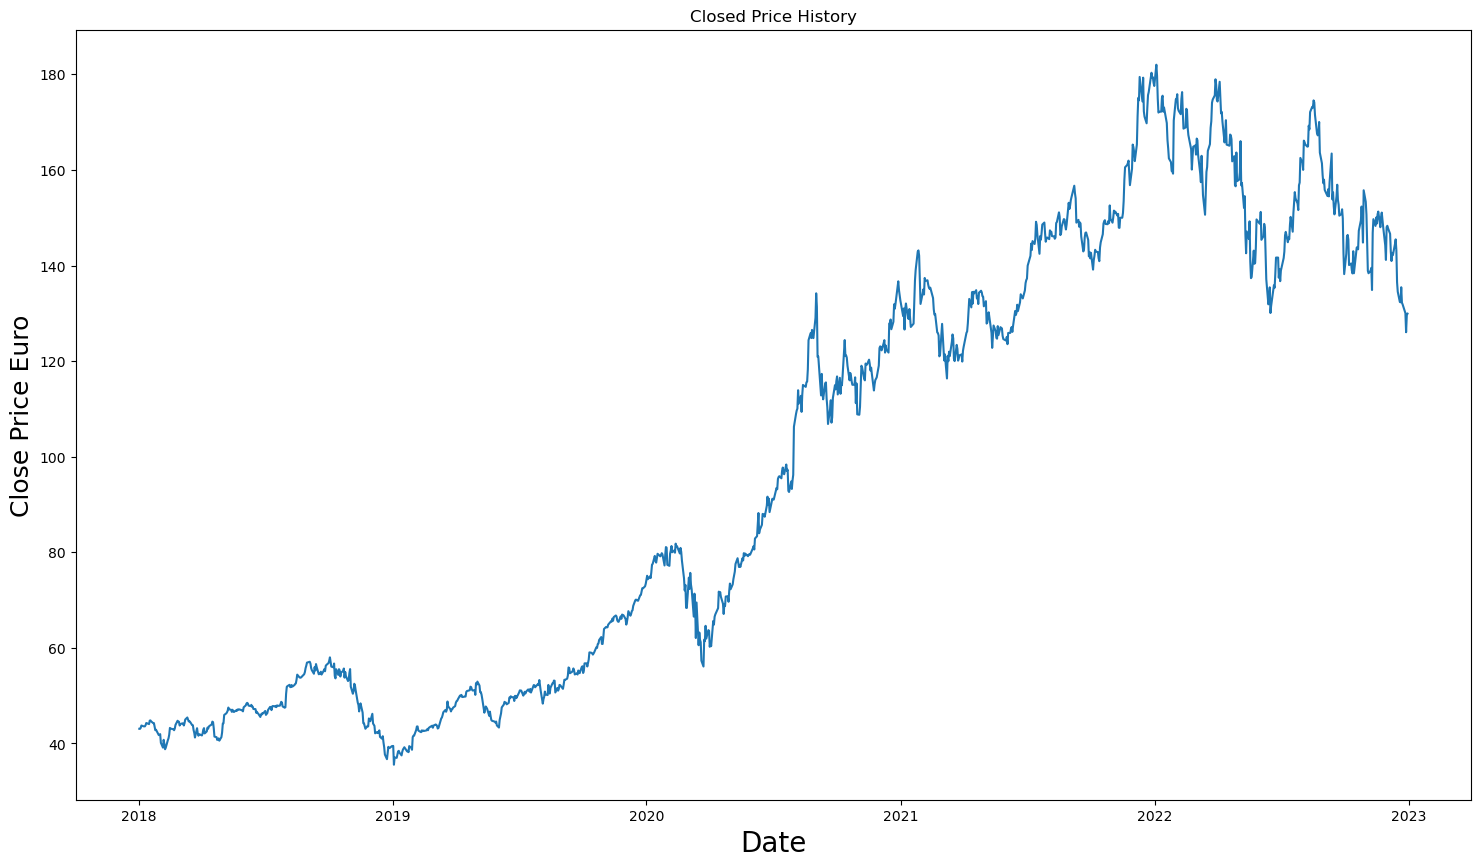

In [93]:
#Visualize the colsing price history
plt.figure(figsize=(18,10))
plt.title('Closed Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price Euro', fontsize=18)
plt.show()

In [94]:
#Create a new dataframe with only the 'Close' column
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .7) #70% of 1239 and rounded up which needs to = to 991.2 

print(training_data_len)

882


In [95]:
#Scale the data (its advantage to apply preprocessing scaling or normalziation to the input data before it is presented to a neural network and it usallu hepts the model aswell)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [96]:
#Create the training data set
#1. Create the scaled training data set
train_data = scaled_data[0:training_data_len , :] #contining all the values of index 0 of training data len

#split the data into x_train and y_train data sets
x_train = [] #indipented training variables
y_train = [] #dependent variable / target variable

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.05132712, 0.05127591, 0.05264146, 0.05600409, 0.05489461,
       0.05486046, 0.05479217, 0.05648203, 0.05957155, 0.05803534,
       0.06300248, 0.06327557, 0.06191006, 0.05941794, 0.0594862 ,
       0.0546727 , 0.04936417, 0.05004693, 0.04398738, 0.04229752,
       0.04308269, 0.04368012, 0.03125373, 0.02440898, 0.03557224,
       0.02961507, 0.02212169, 0.02427243, 0.03502604, 0.0378083 ,
       0.04298027, 0.05257319, 0.05161729, 0.0506273 , 0.04929591,
       0.05173679, 0.05685756, 0.06278058, 0.06179056, 0.06132968,
       0.05600409, 0.05806948, 0.0591107 , 0.05885465, 0.0560553 ,
       0.05931553, 0.06450456, 0.06747461, 0.0644875 , 0.06187591,
       0.06223435, 0.06115901, 0.05651618, 0.05641377, 0.04963728,
       0.04550654, 0.03883247, 0.05219767, 0.04463599, 0.04146112])]
[0.04368011846769615]

[array([0.05132712, 0.05127591, 0.05264146, 0.05600409, 0.05489461,
       0.05486046, 0.05479217, 0.05648203, 0.05957155, 0.05803534,
       0.06300248, 0.06327557, 0.06

In [97]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#Output: 3 dimensional shape for our dataset as LSTM required 3 dimensions

(822, 60, 1)

In [98]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model

In [99]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1) #Epochs is the number of iterations when an entire dataset is passed foward and backward through a neural network


822/822 [==============================] - 26s 24ms/step - loss: 0.0028


In [101]:
#Create the testing data set
#Create a new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60:, :]

#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [102]:
#Convert the data to a numpy array
x_test = np.array(x_test) #the socpe os using np.array is so we can use it in the LSTM model

In [103]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [114]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 0s 19ms/step


In [115]:
#Get the root mean squared error (RMSE) it measures how accurate the model predicts the response and its standard deviation.
rmse=np.sqrt(np.mean((predictions- y_test)**2))
rmse

5.66227233039048

C:\Users\Owner\AppData\Local\Temp\ipykernel_12232\2321885292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


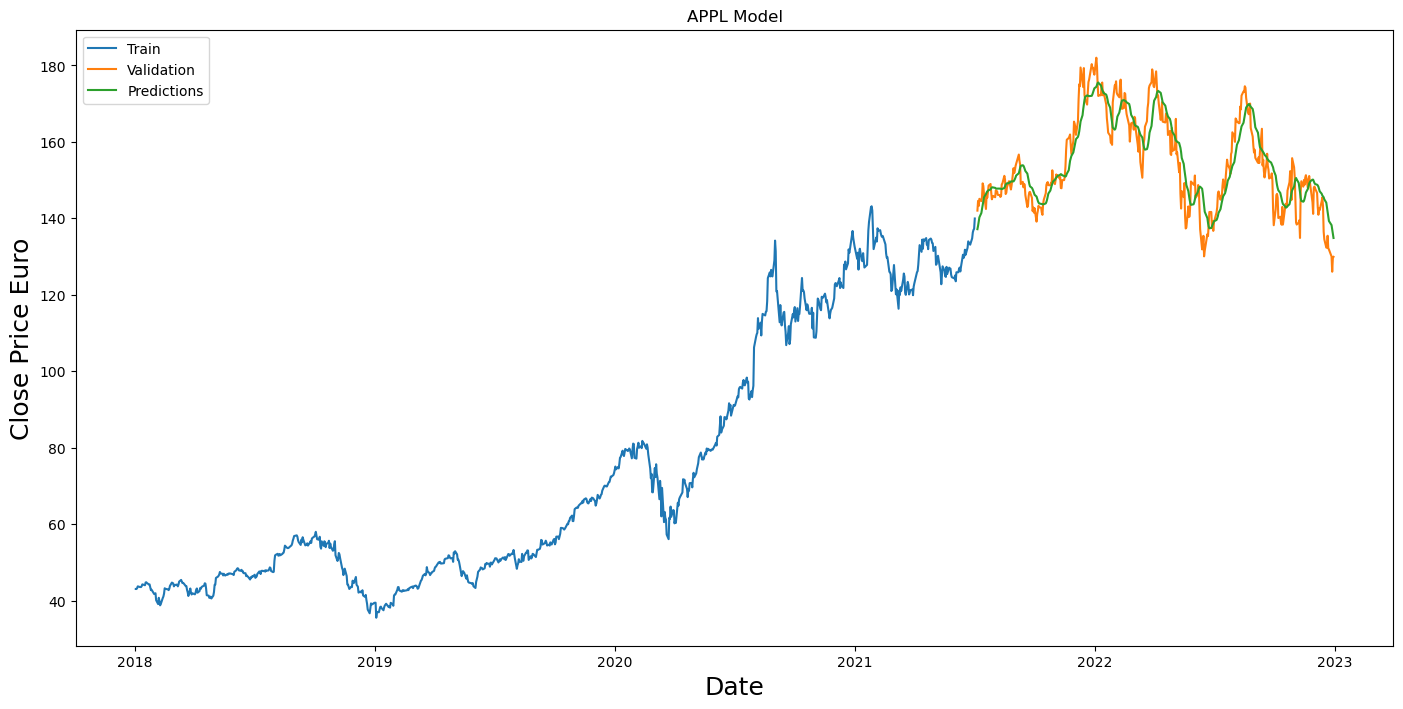

In [116]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(17,8))
plt.title('APPL Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Euro', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions',]])
plt.legend(['Train', 'Validation', 'Predictions'], loc='upper left')
plt.show()

In [107]:
#Show the actual price and the predicted prices
valid

,Close,Predictions
Date,,
2021-07-06,142.020004,137.169083
2021-07-07,144.570007,138.065674
2021-07-08,143.240005,139.162766
2021-07-09,145.110001,140.262894
2021-07-12,144.500000,141.394333
...,...,...
2022-12-23,131.860001,139.309814
2022-12-27,130.029999,138.229385
2022-12-28,126.040001,137.158066
